# EDA-Calidad del dataset Gas_Emissions

## Librerías

In [14]:
import os
import warnings

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator
from sklearn.preprocessing import LabelEncoder

## Ajustes

Se ignoran los warnings.

In [16]:
warnings.filterwarnings("ignore")

Se modifica la configuración para que las tablas salgan completas en las salidas.

In [17]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

## Diccionario de datos

In [18]:
ruta_actual = os.getcwd()

ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_diccionario = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Data_dictionary', 
    'Inventory_of_New_York_City_Greenhouse_Gas_Emissions_Data_Dictionary.xlsx'
    )

diccionario = pd.read_excel(
    ruta_del_diccionario, 
    sheet_name='Column Information', 
    header=1
    )

diccionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Column Name              16 non-null     object
 1   Column Description       16 non-null     object
 2   Expected/Allowed Values  16 non-null     object
 3   Field Limitations        1 non-null      object
 4   Additional Notes         4 non-null      object
dtypes: object(5)
memory usage: 772.0+ bytes


Se va a traducir el diccionario.

In [19]:
def traducir_nombres_columnas(columnas, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return [translator.translate(nombre) for nombre in columnas]

diccionario.columns = traducir_nombres_columnas(diccionario.columns, 'es')

def traducir_fila(texto, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return translator.translate(texto)

diccionario.iloc[0] = diccionario.iloc[0].apply(lambda x: traducir_fila(x, 'es'))

diccionario.fillna("", inplace=True)

def traducir_texto(texto, idioma_destino):
    translator = GoogleTranslator(source='en', target=idioma_destino)
    return translator.translate(texto)

columnas_a_traducir = diccionario.columns[1:]

for columna in columnas_a_traducir:
    diccionario[columna] = diccionario[columna].apply(lambda x: traducir_texto(x, 'es'))
    
diccionario

,Nombre de la columna,Descripción de la columna,Valores esperados/permitidos,Limitaciones del campo,Notas adicionales
0,Nombre de la columna exactamente como aparece en el conjunto de datos.,Una explicación breve y en lenguaje sencillo de lo que significan los datos de la columna.,"Especifique si existe un rango esperado y/o formato de valores posibles. Por ejemplo, si el tipo de datos es Fecha y hora, este campo indicará si la marca de tiempo es MM/DD/AAAA o MM/AAAA. Si el nombre de la columna está helado, este campo puede indicar que los valores pueden ser Chocolate, Vainilla o Fresa.\n\nSi es relevante, este campo especifica la unidad de medida del campo de datos, p. ej., millas, millones, valor en dólares, millas, pies, año, etc.","Describe las características únicas o las posibles limitaciones analíticas que presenta este campo, incluyendo: \n- el razonamiento para cualquier valor nulo, cero o vacío en los datos\n- si los datos en la columna fueron integrados desde otro conjunto de datos u organización\n- si los datos cubiertos incluyen un período de tiempo diferente\n- la fuente de la columna y cómo se generaron los datos en la columna. \n\nPor ejemplo, la información sobre cómo se generaron los datos en esta columna puede incluir si los datos fueron informados directamente por una persona, generados por un sistema de una base de datos o un sistema de una agencia, derivados a través de la manipulación analítica de otros campos o registros; u obtenidos de una agencia diferente.","Proporciona cualquier información relevante adicional sobre los datos de la columna, incluyendo: \n- definiciones de acrónimos, términos o códigos especiales, o jerga que aparece en los valores de campo; \n- el significado de valores confusos o no intuitivos en los datos; \n- cómo la información de esta columna se relaciona con la información de otras columnas; \n- otros detalles únicos sobre esta columna."
1,Inventory,Indicador del inventario asociado a esos datos.,Texto simple,,
2,Sector,Describe los principales sectores del inventario.,Texto simple,,
3,Category Full,La descripción completa de las principales categorías de datos dentro de cada sector,Texto simple,,
4,Category Label,Descripción abreviada de las principales categorías de datos dentro de cada sector,Texto simple,,
5,Source Full,Descripción completa de las fuentes energéticas de las emisiones,Texto simple,,
6,Source Label,Descripción abreviada de las fuentes energéticas de las emisiones,Texto simple,,
7,Source Units,Unidades que rastrean la cantidad de fuentes de energía de emisiones,Texto simple,,
8,CY (2005-2023) Consumed,Cantidad de energía en unidades fuente consumida para esa categoría para ese año civil,Número,,
9,CY (2005-2023) tCO2e (100 yr GWP),Cantidad de CO2e en toneladas emitidas para esa categoría para ese año civil,Número,,tCO2e representa toneladas (t) de dióxido de carbono (CO2) equivalente.


## Importacion del dataset

Se importa el dataset.

In [20]:
ruta_actual = os.getcwd()

ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Datasets', 
    'NYC_Greenhouse_Gas_Emissions_Inventory_20241206.csv'
    )

gas_emissions = pd.read_csv(
    ruta_del_dataset
    )

## Exploración General

Primera fila.

In [21]:
gas_emissions.head(1)

,Inventory Type,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2005 Consumed,CY 2005 tCO2e (100 yr GWP),CY 2005 Source MMBtu,CY 2005 tCO2e (20 yr GWP),CY 2006 Consumed,CY 2006 tCO2e (100 yr GWP),CY 2006 Source MMBtu,CY 2006 tCO2e (20 yr GWP),CY 2007 Consumed,CY 2007 tCO2e (100 yr GWP),CY 2007 Source MMBtu,CY 2007 tCO2e (20 yr GWP),CY 2008 Consumed,CY 2008 tCO2e (100 yr GWP),CY 2008 Source MMBtu,CY 2008 tCO2e (20 yr GWP),CY 2009 Consumed,CY 2009 tCO2e (100 yr GWP),CY 2009 Source MMBtu,CY 2009 tCO2e (20 yr GWP),CY 2010 Consumed,CY 2010 tCO2e (100 yr GWP),CY 2010 Source MMBtu,CY 2010 tCO2e (20 yr GWP),CY 2011 Consumed,CY 2011 tCO2e (100 yr GWP),CY 2011 Source MMBtu,CY 2011 tCO2e (20 yr GWP),CY 2012 Consumed,CY 2012 tCO2e (100 yr GWP),CY 2012 Source MMBtu,CY 2012 tCO2e (20 yr GWP),CY 2013 Consumed,CY 2013 tCO2e (100 yr GWP),CY 2013 Source MMBtu,CY 2013 tCO2e (20 yr GWP),CY 2014 Consumed,CY 2014 tCO2e (100 yr GWP),CY 2014 Source MMBtu,CY 2014 tCO2e (20 yr GWP),CY 2015 Consumed,CY 2015 tCO2e (100 yr GWP),CY 2015 Source MMBtu,CY 2015 tCO2e (20 yr GWP),CY 2016 Consumed,CY 2016 tCO2e (100 yr GWP),CY 2016 Source MMBtu,CY 2016 tCO2e (20 yr GWP),CY 2017 Consumed,CY 2017 tCO2e (100 yr GWP),CY 2017 Source MMBtu,CY 2017 tCO2e (20 yr GWP),CY 2018 Consumed,CY 2018 tCO2e (100 yr GWP),CY 2018 Source MMBtu,CY 2018 tCO2e (20 yr GWP),CY 2019 Consumed,CY 2019 tCO2e (100 yr GWP),CY 2019 Source MMBtu,CY 2019 tCO2e (20 yr GWP),CY 2020 Consumed,CY 2020 tCO2e (100 yr GWP),CY 2020 Source MMBtu,CY 2020 tCO2e (20 yr GWP),CY 2021 Consumed,CY 2021 tCO2e (100 yr GWP),CY 2021 Source MMBtu,CY 2021 tCO2e (20 yr GWP),CY 2022 Consumed,CY 2022 tCO2e (100 yr GWP),CY 2022 Source MMBtu,CY 2022 tCO2e (20 yr GWP),CY 2023 Consumed,CY 2023 tCO2e (100 yr GWP),CY 2023 Source MMBtu,CY 2023 tCO2e (20 yr GWP),2005 - 2022 % change Consumed,2005 - 2022 % change tCO2e,2005 - 2022 % change Source MMBtu,2005 - 2022 % change tCO2e 20 yr GWP
0,GPC,Stationary Energy,Residential (small and large residential),Residential,#2 fuel oil,#2 fuel oil,gallon,1.466460e+08,1517233.2,20439518.9,1549279.75,1.236520e+08,1279331.85,17234613.31,1306353.52,1.422401e+08,1471649.29,19825431.82,1502733.03,1.311070e+08,1356463.27,18273694.95,1385114.09,146483621.5,1515553.24,20416887.16,1547564.31,1.411770e+08,1460649.45,19677246.7,1491500.85,1.381669e+08,1429506.28,19257699.26,1459699.89,1.252074e+08,1295424.21,17451402.73,1322785.78,1.603248e+08,1658757.6,22346075.33,1693793.39,1.229829e+08,1272409.02,17141351.95,1299284.47,160363033.9,1659152.83,22351399.66,1694196.97,1.225838e+08,1268280.5,17085734.23,1295068.74,1.057673e+08,1094293.32,14741853.15,1117406.66,1.344716e+08,1391274.0,18742650.26,1420660.08,136255620.5,1409731.99,18991308.38,1439507.93,97015873.57,1003748.54,13522072.46,1024949.42,94453737.87,977240.1,13164961.98,997881.07,1.059489e+08,1096171.18,14767150.78,1119324.18,90526881.46,936611.94,12617636.74,956394.78,-38.268426,-38.268426,-38.268426,-38.268426


## Tamaño del Dataset

Se obtienen la cantidad de filas y la cantidad de columnas.

In [22]:
print("Cantidad de filas: ")
print(gas_emissions.shape[0])
print()
print("Cantidad de columnas:")
print(gas_emissions.shape[1])

Cantidad de filas: 
85

Cantidad de columnas:
87


## Valores Faltantes

Se seleccionan las columnas de tipo object.

In [23]:
columnas_object = gas_emissions.select_dtypes(include='object').columns

columnas_object

Index(['Inventory Type', 'Sectors Sector', 'Category Full', 'Category Label',
       'Source Full', 'Source Label', 'Source Units'],
      dtype='object')

Se comprueba si tienen cadenas vacías.

In [24]:
filas_con_valores_vacios = gas_emissions[
    columnas_object].apply(lambda x: x == "").any(axis=1)

print('Cantidad de valores faltantesen las columnas de tipo object:')
print(filas_con_valores_vacios.sum())

Cantidad de valores faltantesen las columnas de tipo object:
0


**Esta completo en sus valores de tipo texto**

## Valores Nulos

In [25]:
print('Cantidad de valores nulos')

print(gas_emissions.isnull().sum().sum())

Cantidad de valores nulos
0


**Esta completo**

## Tipos de Datos

Se obtiene el nombre de cada columna y su tipo de dato.

In [26]:
gas_emissions.dtypes

Inventory Type                           object
Sectors Sector                           object
Category Full                            object
Category Label                           object
Source Full                              object
Source Label                             object
Source Units                             object
CY 2005 Consumed                        float64
CY 2005 tCO2e (100 yr GWP)              float64
CY 2005 Source MMBtu                    float64
CY 2005 tCO2e (20 yr GWP)               float64
CY 2006 Consumed                        float64
CY 2006 tCO2e (100 yr GWP)              float64
CY 2006 Source MMBtu                    float64
CY 2006 tCO2e (20 yr GWP)               float64
CY 2007 Consumed                        float64
CY 2007 tCO2e (100 yr GWP)              float64
CY 2007 Source MMBtu                    float64
CY 2007 tCO2e (20 yr GWP)               float64
CY 2008 Consumed                        float64
CY 2008 tCO2e (100 yr GWP)              

Las columnas tienen sus tipos correctos ya que concuerdan con la columna de 'Valores esperados/permitidos' del diccionario.

**Tipos correctos**

## Valores Duplicados

In [27]:
print(gas_emissions.duplicated().sum())

0


No hay ningun valor duplicado.

**Sin duplicados en todo el Dataset**

## Outliers y Distribución

### Columnas Numéricas

In [28]:
columnas_numericas = gas_emissions.select_dtypes(include=[float, int]).columns
print("Columnas numéricas:", columnas_numericas)

Columnas numéricas: Index(['CY 2005 Consumed', 'CY 2005 tCO2e (100 yr GWP)',
       'CY 2005 Source MMBtu', 'CY 2005 tCO2e (20 yr GWP)', 'CY 2006 Consumed',
       'CY 2006 tCO2e (100 yr GWP)', 'CY 2006 Source MMBtu',
       'CY 2006 tCO2e (20 yr GWP)', 'CY 2007 Consumed',
       'CY 2007 tCO2e (100 yr GWP)', 'CY 2007 Source MMBtu',
       'CY 2007 tCO2e (20 yr GWP)', 'CY 2008 Consumed',
       'CY 2008 tCO2e (100 yr GWP)', 'CY 2008 Source MMBtu',
       'CY 2008 tCO2e (20 yr GWP)', 'CY 2009 Consumed',
       'CY 2009 tCO2e (100 yr GWP)', 'CY 2009 Source MMBtu',
       'CY 2009 tCO2e (20 yr GWP)', 'CY 2010 Consumed',
       'CY 2010 tCO2e (100 yr GWP)', 'CY 2010 Source MMBtu',
       'CY 2010 tCO2e (20 yr GWP)', 'CY 2011 Consumed',
       'CY 2011 tCO2e (100 yr GWP)', 'CY 2011 Source MMBtu',
       'CY 2011 tCO2e (20 yr GWP)', 'CY 2012 Consumed',
       'CY 2012 tCO2e (100 yr GWP)', 'CY 2012 Source MMBtu',
       'CY 2012 tCO2e (20 yr GWP)', 'CY 2013 Consumed',
       'CY 2013 tCO2e (1

Cantidad de columnas numéricas:

In [29]:
print("La cantidad de columnas numéricas son:")
print(len(columnas_numericas))

La cantidad de columnas numéricas son:
80


#### Histogramas de las primeras cinco columnas numéricas

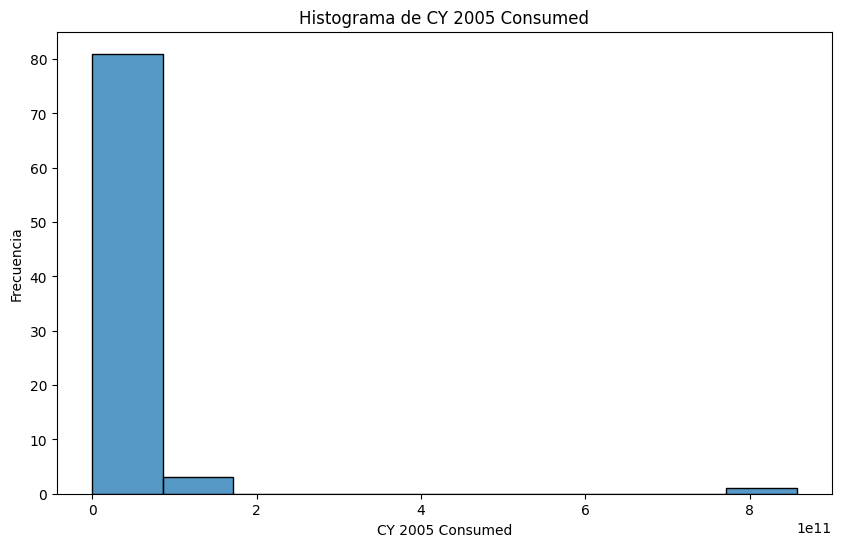

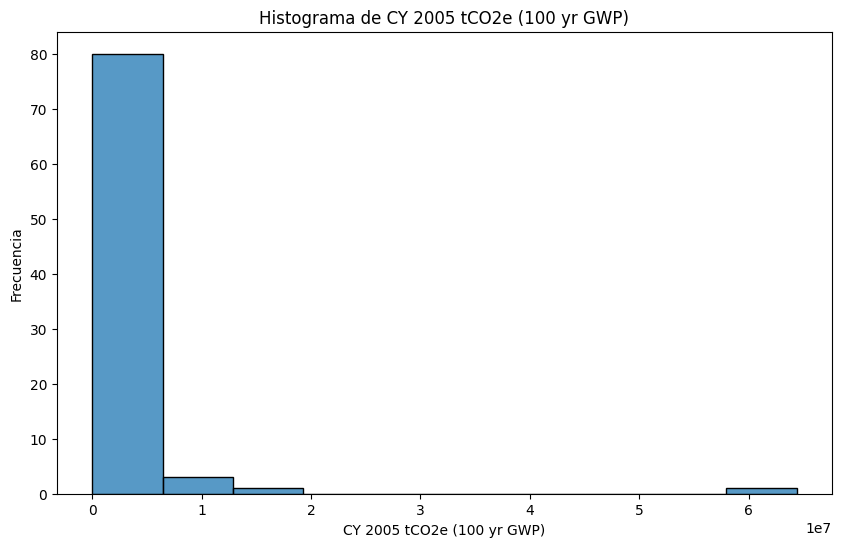

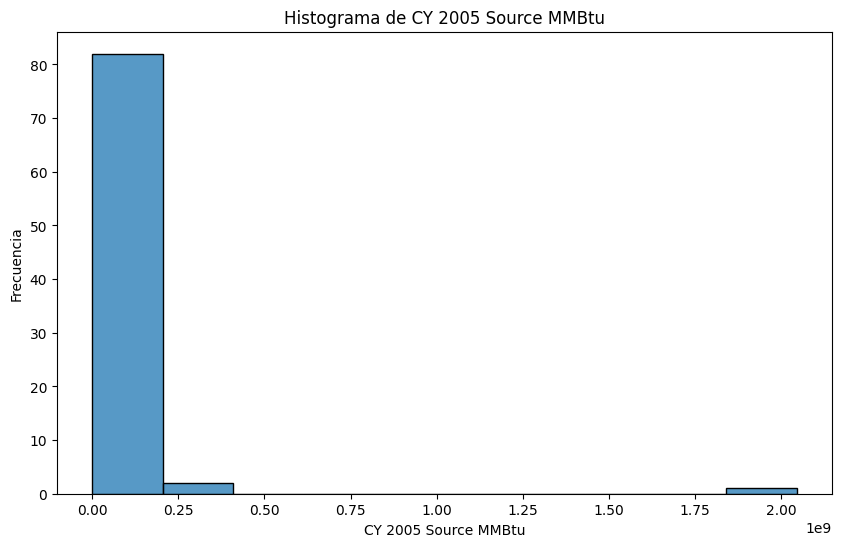

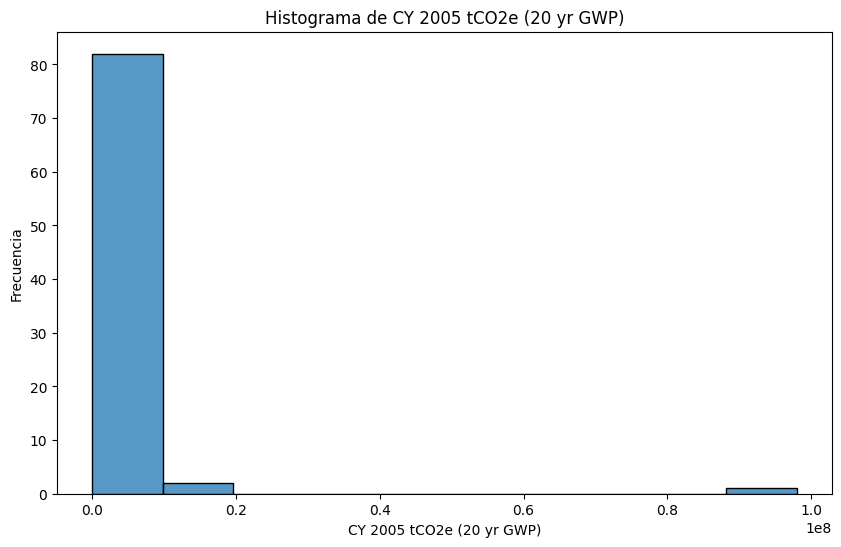

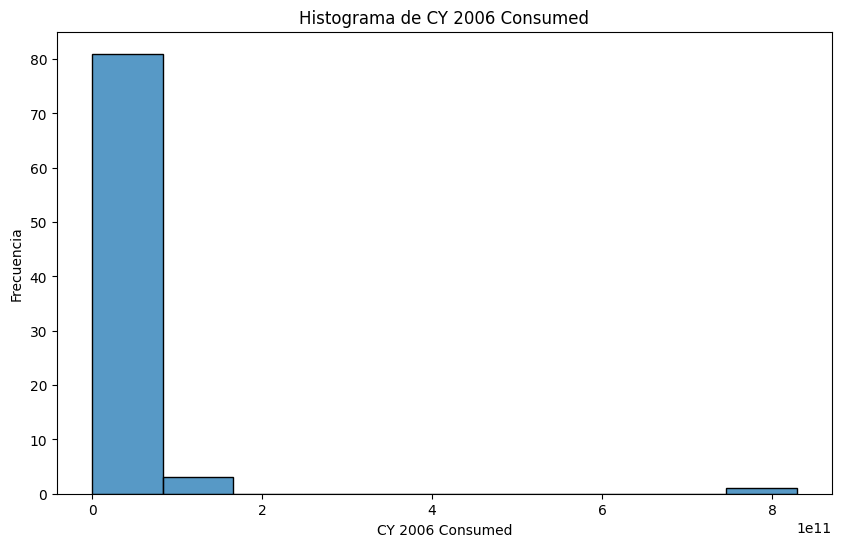

In [30]:
for columna in columnas_numericas[:5]:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=gas_emissions[columna], bins=10)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

Los histogramas muestran que la mayoria de los valores estan en la primera barra con el limite inferior en 0.

Hay entre 3 y 4 barras.

La última barra tiene outliers. Entre esta frecuencia y los demás hay un espacio vacio. Esto se repite en todos los histogramas.

#### Histograma de la Columna 'Mediana_Columnas' de todas las columnas numéricas

Se crea una columna que sea mediana de todas las columnas numéricas.

In [31]:
gas_emissions['Mediana_Columnas'] = gas_emissions[
    columnas_numericas].median(axis=1)

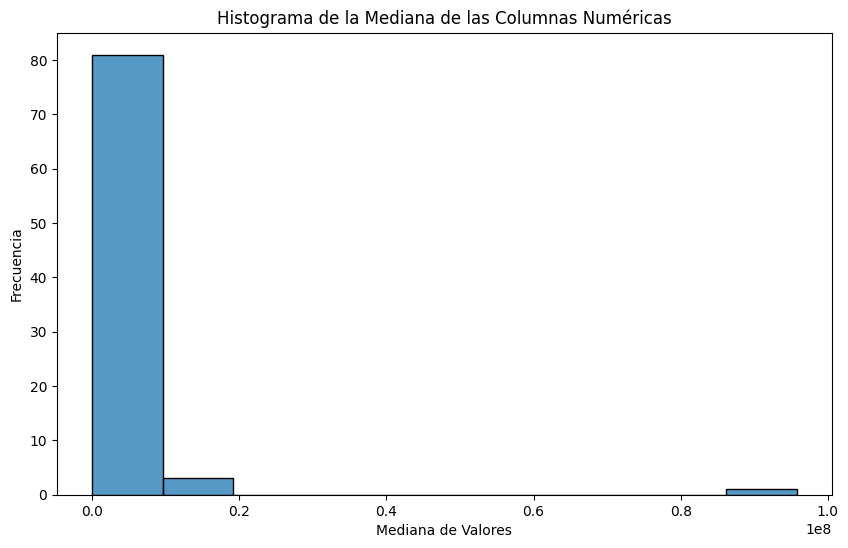

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(gas_emissions['Mediana_Columnas'], bins=10)
plt.title('Histograma de la Mediana de las Columnas Numéricas')
plt.xlabel('Mediana de Valores')
plt.ylabel('Frecuencia')
plt.show()

El resultado indica que la observación hecha de los primeros histogramas se repite en el histograma que muestra la mediana de las columnas.

Se obtienen los cuartiles y la mediana de la columna 'Mediana_Columnas'.

In [33]:
Q1 = gas_emissions['Mediana_Columnas'].quantile(0.25)
print(f'Primer Cuartil (Q1): {Q1}')

mediana = gas_emissions['Mediana_Columnas'].median()
print(f'Mediana: {mediana}')

Q3 = gas_emissions['Mediana_Columnas'].quantile(0.75)
print(f'Tercer Cuartil (Q3): {Q3}')

Primer Cuartil (Q1): 0.0
Mediana: 103675.075
Tercer Cuartil (Q3): 1012588.19


Los gráficos indican que los valores están muy agrupados. Por consiguiente la mejor medida de tendencia central es la Mediana.

**Usar como medida de tendencia central la Mediana**

### Columnas Categóricas

In [34]:
columnas_categoricas = gas_emissions.select_dtypes(object).columns
print("Columnas Categóricas:", columnas_categoricas)

Columnas Categóricas: Index(['Inventory Type', 'Sectors Sector', 'Category Full', 'Category Label',
       'Source Full', 'Source Label', 'Source Units'],
      dtype='object')


#### Barplot de las Columnas Categóricas

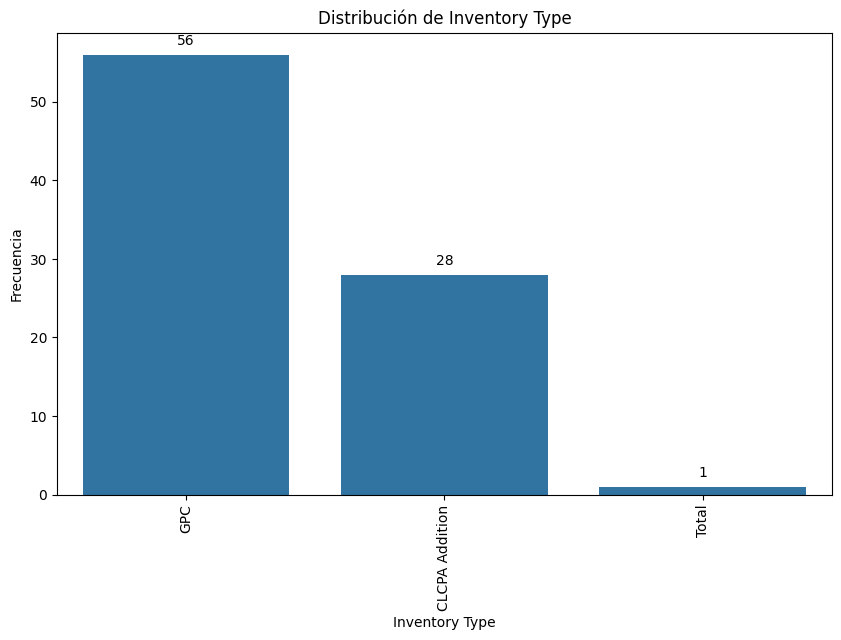

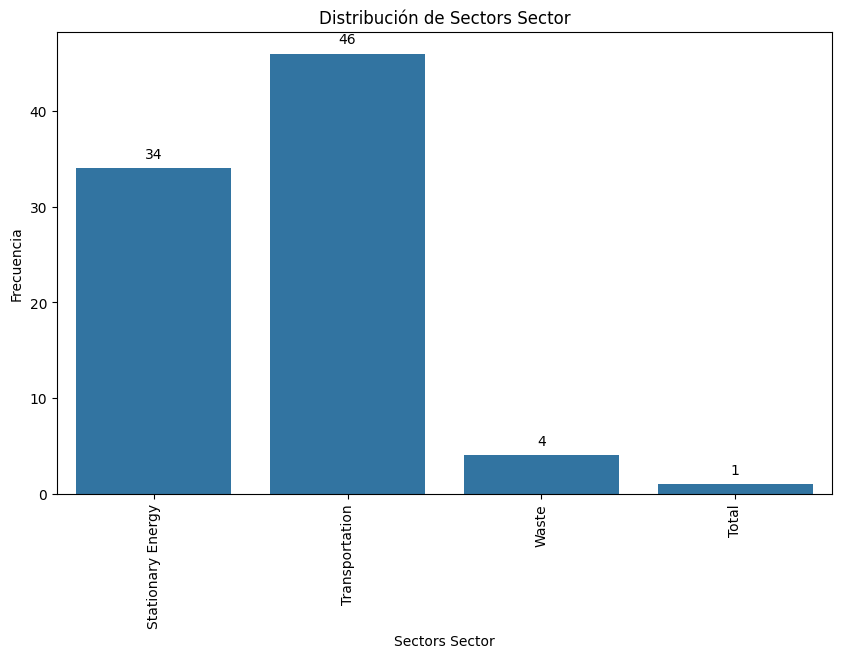

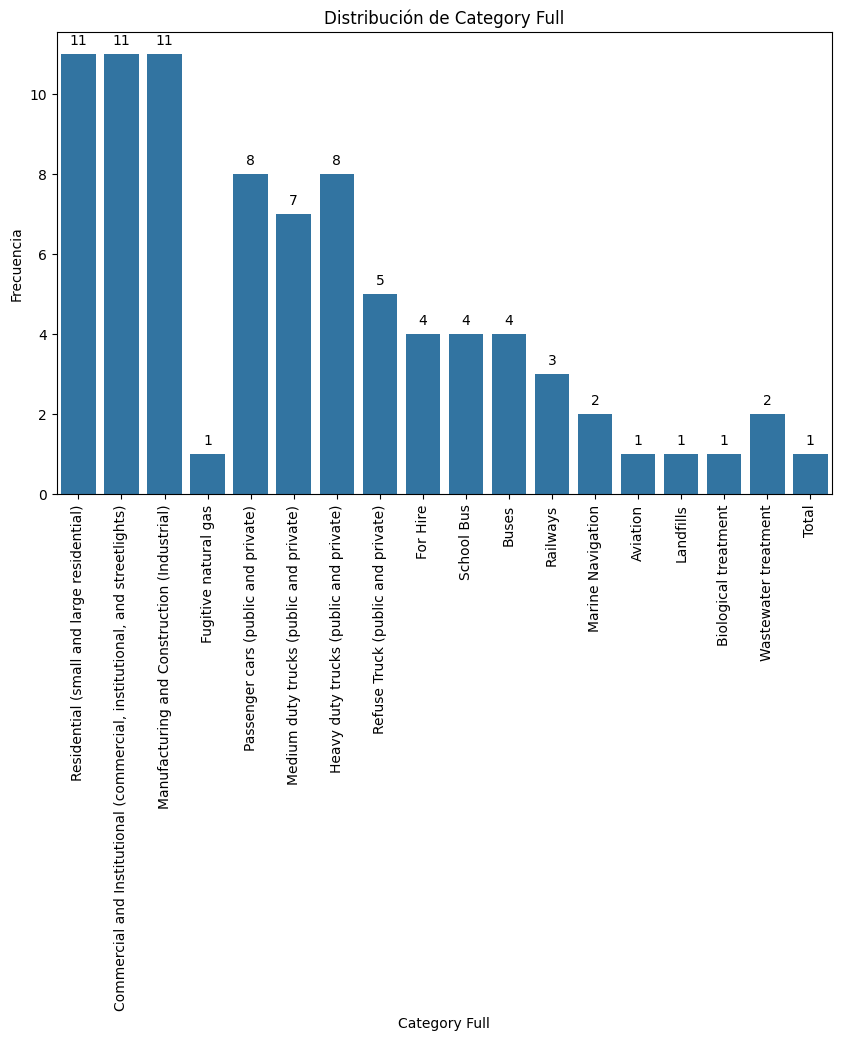

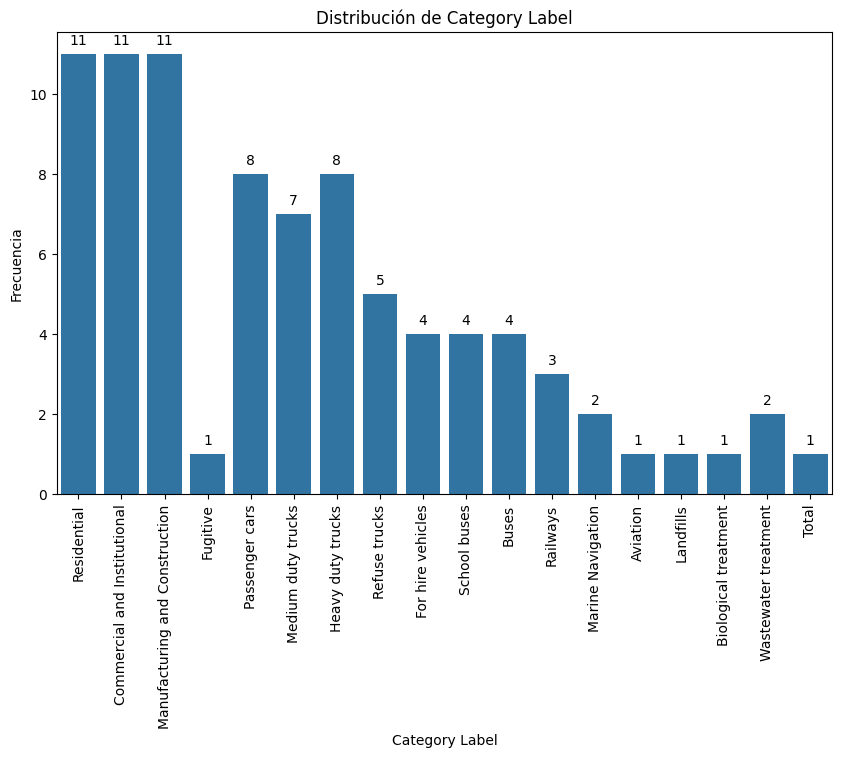

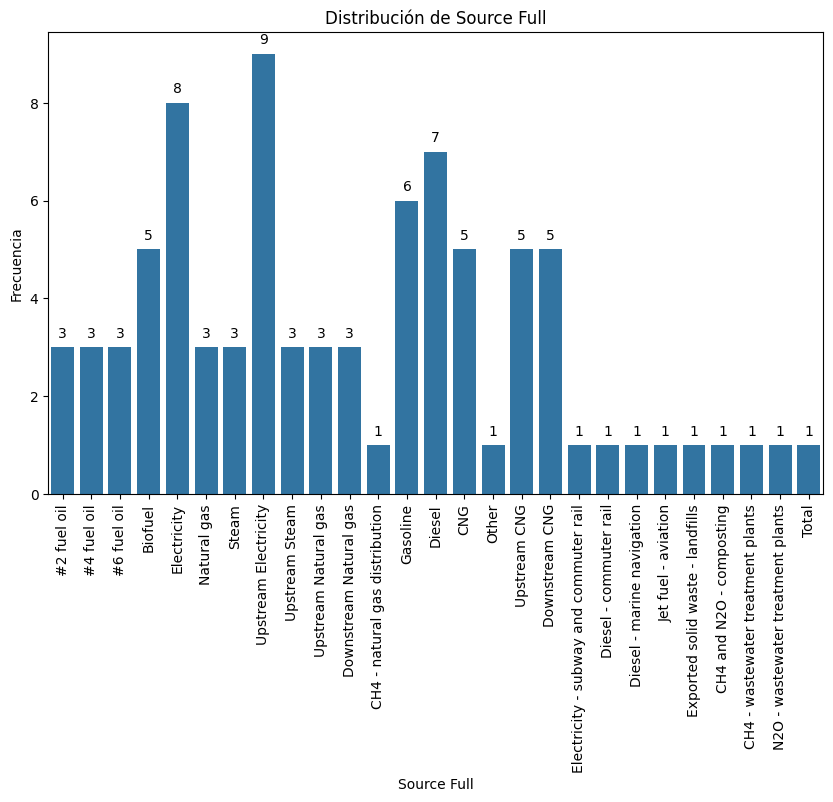

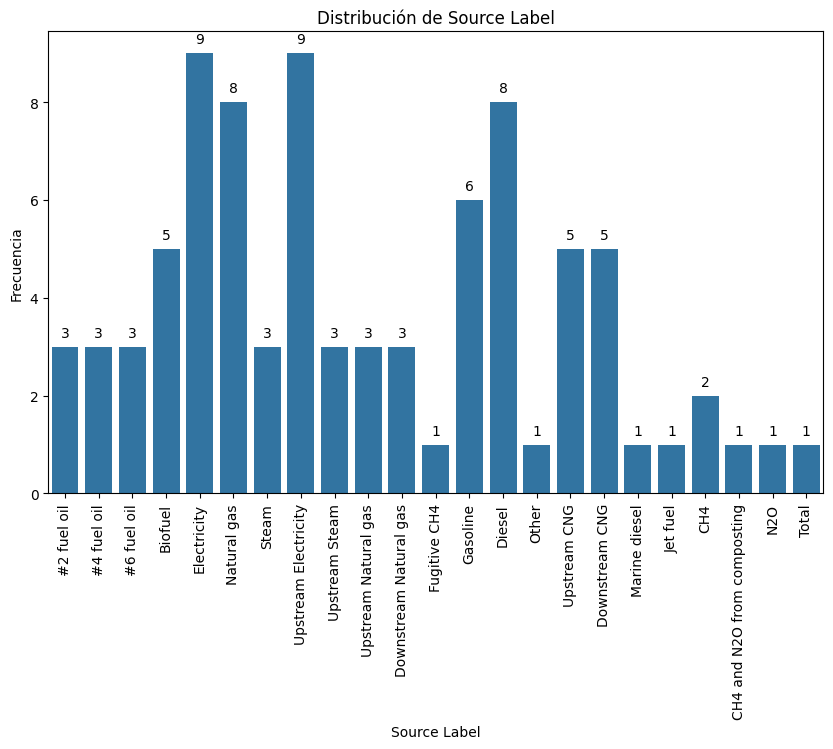

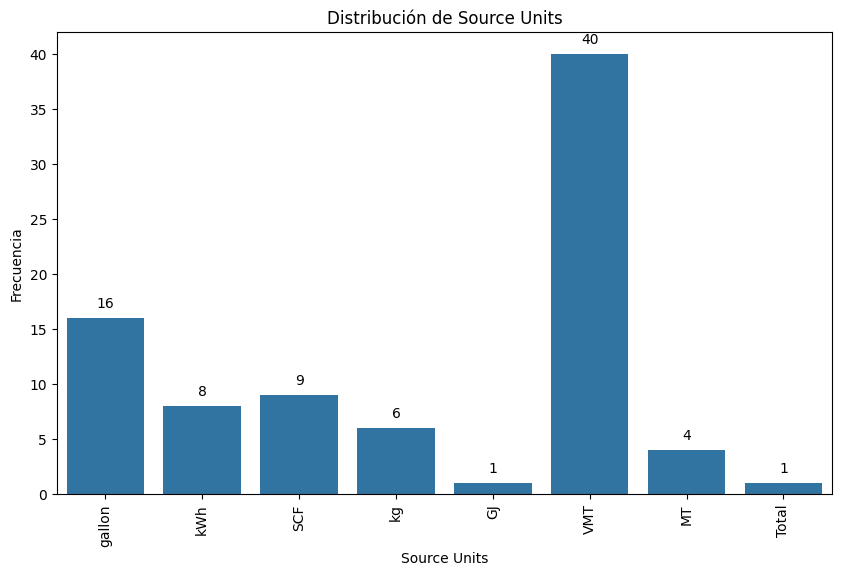

In [35]:
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(x=columna, data=gas_emissions)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')
    
    plt.show()

Hay que analizar los gráficos más detenidamente en el EDA profundo.

## Correlaciones

### Correlaciones de Pearson, Spearman y Kendall de Columnas Categóricas

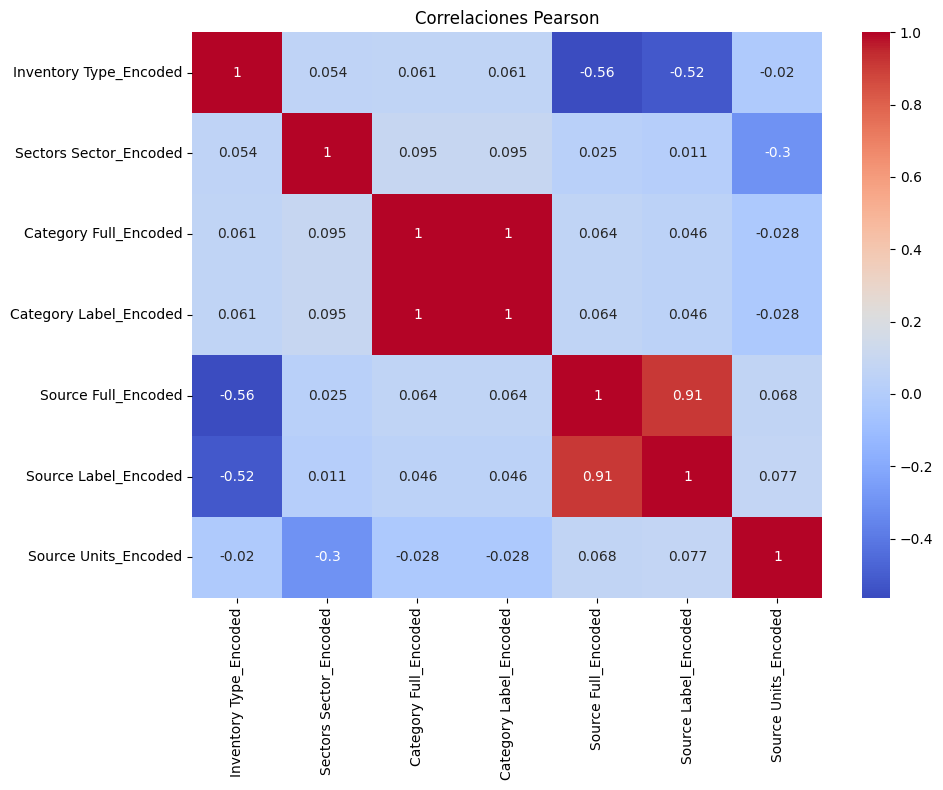

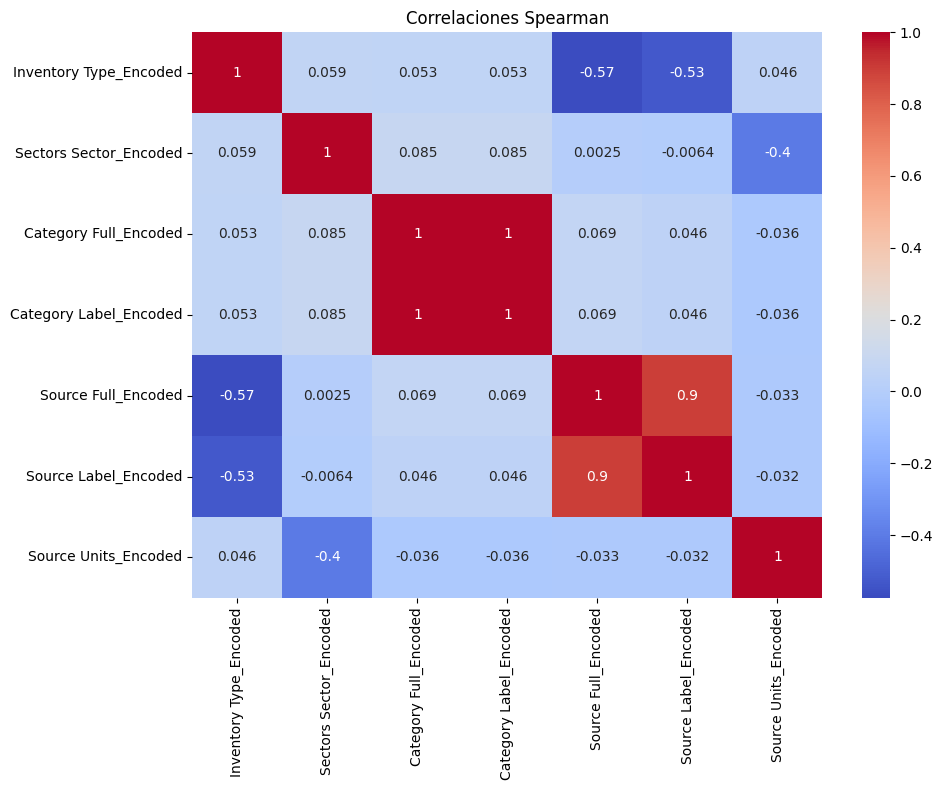

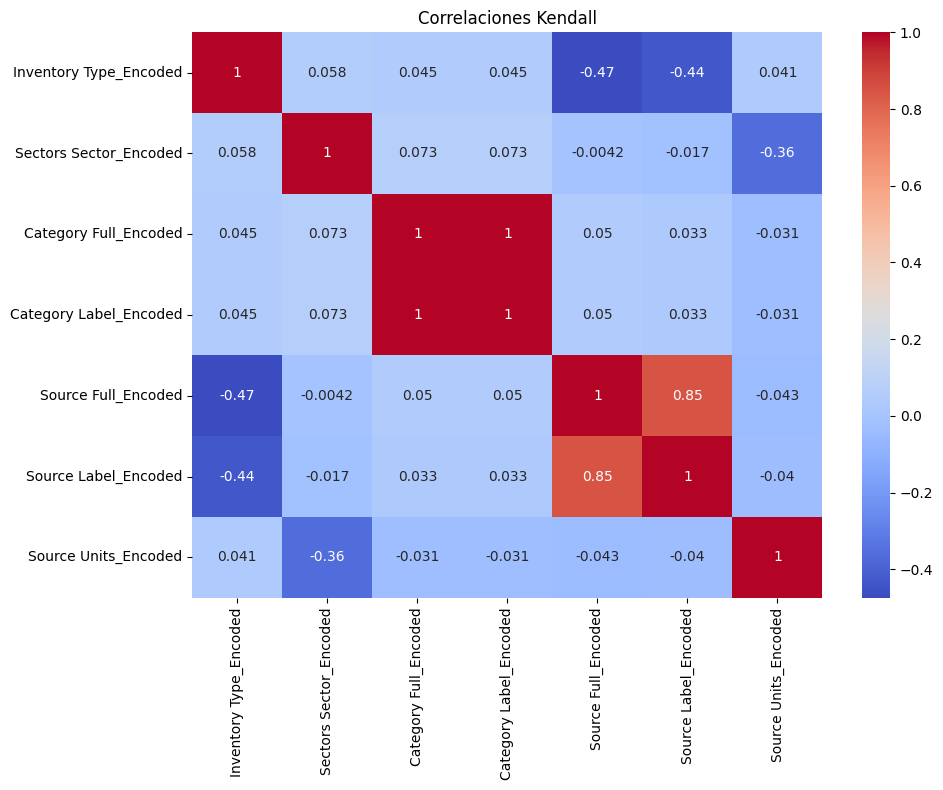

In [36]:
label_encoders = {}
for column in ['Inventory Type', 'Sectors Sector', 'Category Full', 'Category Label', 'Source Full', 'Source Label', 'Source Units']:
    le = LabelEncoder()
    gas_emissions[f'{column}_Encoded'] = le.fit_transform(gas_emissions[column])
    label_encoders[column] = le

correlation_methods = ['pearson', 'spearman', 'kendall']
correlations = {}

for method in correlation_methods:
    corr_matrix = gas_emissions[
        ['Inventory Type_Encoded', 'Sectors Sector_Encoded', 'Category Full_Encoded', 
         'Category Label_Encoded', 'Source Full_Encoded', 'Source Label_Encoded', 'Source Units_Encoded']
    ].corr(method=method)
    correlations[method] = corr_matrix

for method in correlation_methods:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations[method], annot=True, cmap='coolwarm')
    plt.title(f'Correlaciones {method.capitalize()}')
    plt.tight_layout()
    plt.show()

Los tres gráficos muestran básicamente el mismo patrón.

Dos columnas tienen una correlación de 1 porque son la descripcion de lo mismo pero una esta abreviada y la otra esta completa.

Hay dos columnas que también tienen la misma relación entre sí como las anteriores pero llamativamente hay diferencia de correlación entre ambas.

### Correlaciones de Pearson, Spearman y Kendall de Columnas Categóricas y Numericas

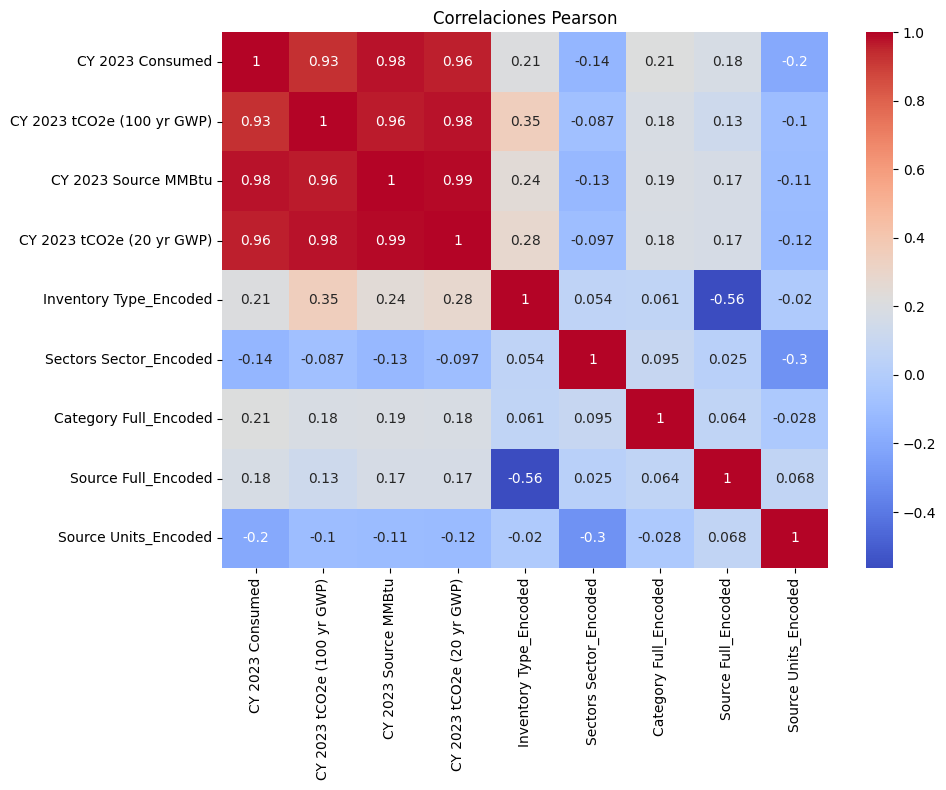

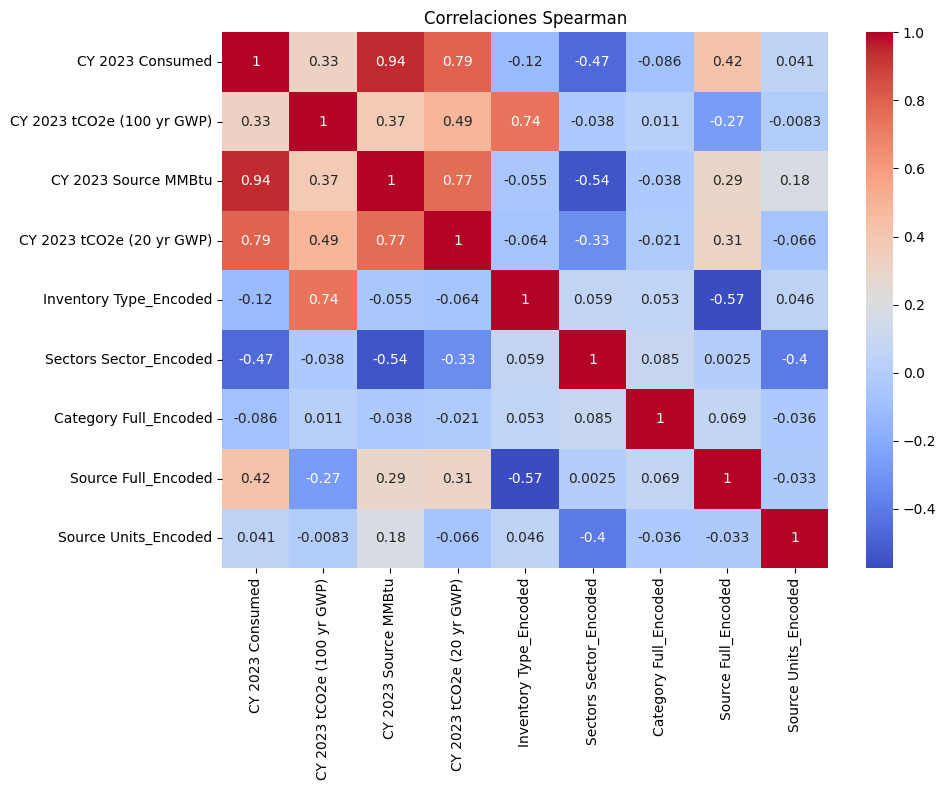

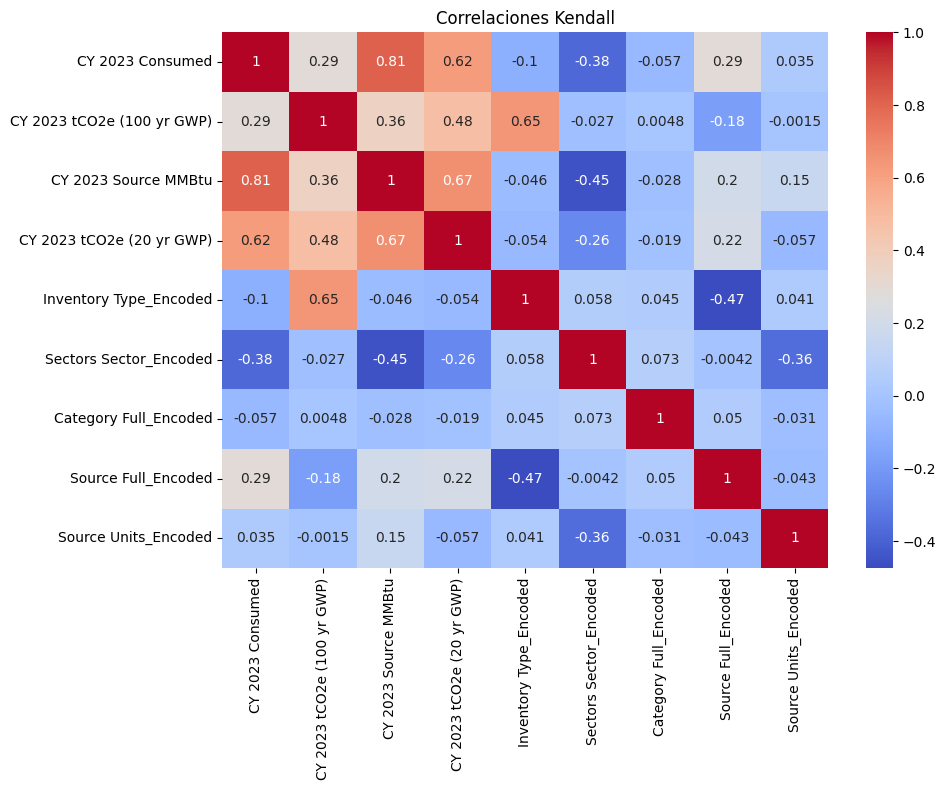

In [37]:
numeric_columns_2023 = gas_emissions.filter(like='2023').select_dtypes(include=['float64']).columns

# Seleccionar las columnas categóricas específicas
categorical_columns = ['Inventory Type', 'Sectors Sector', 'Category Full', 'Source Full', 'Source Units']

# Codificar variables categóricas
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    gas_emissions[f'{column}_Encoded'] = le.fit_transform(gas_emissions[column])
    label_encoders[column] = le

# Crear una lista completa de las columnas codificadas y las columnas numéricas seleccionadas
encoded_columns = [f'{column}_Encoded' for column in categorical_columns]
selected_columns = list(numeric_columns_2023) + encoded_columns

# Calcular las correlaciones
correlation_methods = ['pearson', 'spearman', 'kendall']
correlations = {}

for method in correlation_methods:
    corr_matrix = gas_emissions[selected_columns].corr(method=method)
    correlations[method] = corr_matrix

# Visualizar las correlaciones en gráficos separados
for method in correlation_methods:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations[method], annot=True, cmap='coolwarm')
    plt.title(f'Correlaciones {method.capitalize()}')
    plt.tight_layout()
    plt.show()


Las colomnas numéricas están fuertemente correlacionadas entre sí. Las demas columnas categoricas poseen casi nula correlacion entre ellas y con las columnas numéricas. Pero hay una excepcion en las correlaciones de Spearman y kendall. Esa excepcion es la fuerte correlacion entre la columna categorica 'Inventory Type' y la columna numerica 'CY 2023 tCO2e (100 yr GWP)'